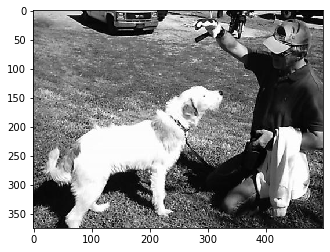

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "data/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[132 182 193 ...   4   4   4]
 [151 186 182 ...   5   5   5]
 [166 200 194 ...   6   6   6]
 ...
 [ 35 113 141 ...  12  26  46]
 [ 63 164 199 ...  13  30  55]
 [ 54 152 186 ...   0  13  39]]


In [6]:
img_array.shape

(375, 500)

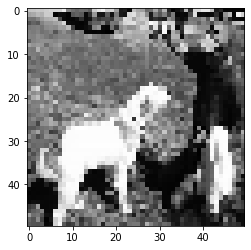

In [10]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [12]:
print(len(training_data))

4813


In [13]:
import random

random.shuffle(training_data)

In [15]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
1


In [20]:
X = []
y = []

In [21]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [24]:
X[1]

array([[[138],
        [135],
        [132],
        ...,
        [108],
        [ 97],
        [ 79]],

       [[133],
        [132],
        [131],
        ...,
        [ 98],
        [114],
        [ 90]],

       [[135],
        [131],
        [132],
        ...,
        [102],
        [113],
        [117]],

       ...,

       [[167],
        [168],
        [176],
        ...,
        [103],
        [114],
        [ 91]],

       [[156],
        [155],
        [155],
        ...,
        [134],
        [ 47],
        [ 91]],

       [[160],
        [157],
        [163],
        ...,
        [ 89],
        [103],
        [136]]], dtype=uint8)